In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt
from functools import reduce

In [13]:
df = pd.read_csv('C:/Users/sadiy/OneDrive/Desktop/Capstone/PIP -40001/Fake social media profile detection and reporting/model/Dataset/instagram.csv',encoding= 'unicode_escape')

In [14]:
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [15]:
df.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [16]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [18]:
df['profile pic'].unique()

array([1, 0], dtype=int64)

In [19]:
df['nums/length username'].unique()

array([0.27, 0.  , 0.1 , 0.29, 0.13, 0.18, 0.33, 0.12, 0.19, 0.2 , 0.06,
       0.44, 0.24, 0.14, 0.36, 0.22, 0.08, 0.15, 0.09, 0.45, 0.38, 0.11,
       0.17, 0.31, 0.3 , 0.07, 0.43, 0.5 , 0.25, 0.57, 0.88, 0.55, 0.8 ,
       0.4 , 0.41, 0.67, 0.89, 0.16, 0.58, 0.64, 0.42, 0.21, 0.71, 0.83,
       0.47, 0.91, 0.28, 0.54, 0.46, 0.73, 0.6 , 0.86, 0.62, 0.92])

In [20]:
df['fullname words'].unique()

array([ 0,  2,  1,  4,  3,  6, 12,  5, 10], dtype=int64)

In [21]:
df['nums/length fullname'].unique()

array([0.  , 0.12, 0.1 , 0.08, 0.24, 0.25, 0.33, 0.14, 0.22, 0.43, 0.4 ,
       0.36, 0.29, 0.11, 0.31, 0.89, 0.2 , 0.38, 0.27, 0.44, 1.  , 0.5 ,
       0.18, 0.57, 0.46])

In [22]:
df['name==username'].unique()

array([0, 1], dtype=int64)

In [23]:
df['description length'].unique()

array([ 53,  44,   0,  82,  81,  50,  71,  40,  54, 103,  98,  46,  48,
        63, 106,  35,  30,  27, 109, 132, 126, 122, 138,  56,   9, 134,
         2,  23,  93,   4,   1,  91,  57, 108,  12,   3,  39,  68, 129,
        64,  42,  70,  74,   8,  28,  18,  36,  11,  29,  24,  21,  34,
        59,  15,  16,  73,  26,  55, 140, 113,  38,  89, 123,  33,   5,
       150, 149, 148,  19, 133,  43,  37,  87,  95, 117,  58,  62, 137,
        14, 131,  10,  72,  51,  13, 105,  67,  20,  86,  96,  17,  61,
       112, 101,  32,  80, 146,   6,  49, 120,  25, 139,  31,   7,  22],
      dtype=int64)

In [24]:
df['external URL'].unique()

array([0, 1], dtype=int64)

In [25]:
df['private'].unique()

array([0, 1], dtype=int64)

In [26]:
df['#posts'].unique()

array([  32,  286,   13,  679,    6,  344,   16,   33,   72,  213,  648,
         76,  298,  117,  487,  254,   59, 1570,  378,  526,  228,   35,
        281,  285,  148,   57,   17,  511,  230,   15,  980,   53,  111,
        719, 1164,  497,   18,   50,   74,    8, 7389,  420,  433,  156,
       4494,  751,    4,   27,   91,  262,  274,  271,  713,  200,   12,
         26,   75,   94,   63,   69,   19,  100,  661,  149,   22,  400,
        122,   77,    5,    3,  106,   14,  172,   38,  227,  221,  580,
         40,  101,  157,  197,   61,  698,   49,   85,   58,  232,   20,
         98,  559,  189,  388,   28,  775,  205,  209,  334,    9,  416,
          1,  711,  114,  107,    7,   21,   65,   10,  137,  571,   24,
        328,  161,  280,   92,   31,    0,   25,  921, 1020,  301,  158,
         43,   60,  220, 1159,  396,    2,  131,   36,   11,  252,   83,
        126,  663,   64,  664,  130,  917,  142,  165,   80,   81,  373,
         56,   93,  192,  145,  135,  222,  119,  2

In [27]:
df['#followers'].unique()

array([    1000,     2740,      159,      414,      151,   669987,
            122,     1078,     1824,    12945,     9884,     1188,
            945,    12033,     1962,    50374,     7007,     1128,
          34670,     2338,     3516,     1809,      427,      759,
       15338538,      109,      536,   121354,     2284,      186,
            687,      966,      177,      744,   542073,  5315651,
            267,      691,      120,      105,   890969,   361853,
           3678,    92192, 12397719,   380510,      132,      162,
            369,     1476,     1798,     2118,      812,     7217,
            313,       64,     1759,      404,     1843,   320377,
            108,      384,       60,      802,    51145,     1582,
            223,    18842,    10240,      539,      399,      581,
            166,      417,      266,       33,      494,      178,
            470,      807,    17303,     1439,    91446,      824,
            741,     1267,     4594,     1135,     1926,     1

In [28]:
df['#follows'].unique()

array([ 955,  533,   98,  651,  126,  150,  177,   76, 2713,  813, 1173,
        365,  583,  248, 2701,  900,  289,  694, 1878,  776,  999,  416,
        470,  956,   61,  179,  665,  176,  130,  174, 1517,  952,  170,
        967,  674, 2703,  328,  680,  112,   11, 1359,   16,    8,    0,
        183,  208,  546,  666,  461, 1109,  432,  761,  376,  261,  643,
        283,  598,  228,   97,  447,  100,  151,  528, 1882,  266,  744,
       1255,  639,  452,  568,  163,  362,  324,   37,  998,  245,  288,
        675,  256,  395,  360,  629,  526,  489, 1440,  899, 1713, 1410,
       1925,  748,  469, 1074,  935,  599,  418,  438,  413,   55,  222,
         20,  173,  591,  638,  589,  390,   75, 1155, 1854,  164,  333,
       4659, 1093, 2047,  132,  689,  178, 1142,  209,  424,   80,  719,
       7500,  703, 3296,  270,   65,  610, 7202, 1039,  524,  138,  806,
        503, 1208,  802,  111,  475, 1061,  305,  375,   72,  371,  633,
       1016, 1065, 7399, 1216, 2928,  635,  417,  1

In [29]:
df['fake'].unique()

array([0, 1], dtype=int64)

In [30]:
import seaborn as sns

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\1213997271.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: >

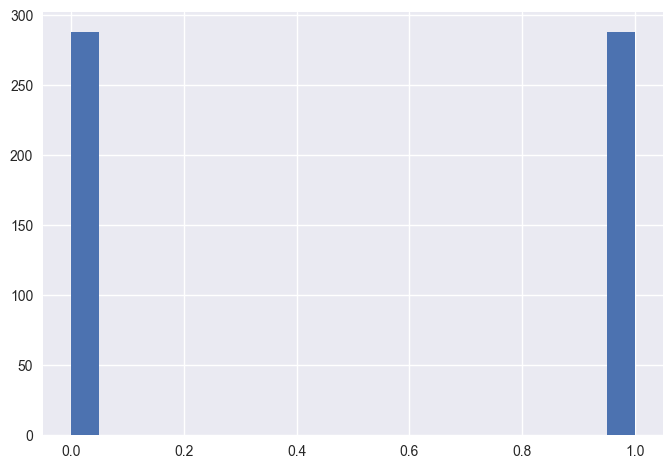

In [31]:
plt.style.use('seaborn')
df['fake'].hist(bins=20)      

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\1295440802.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: >

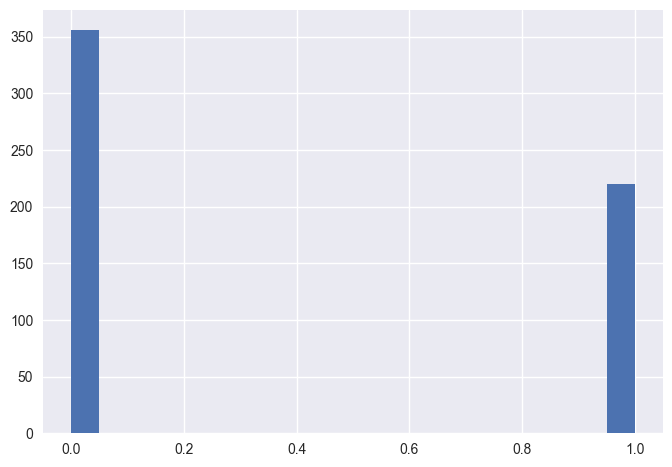

In [32]:
plt.style.use('seaborn')
df['private'].hist(bins=20)     

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\845631239.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: >

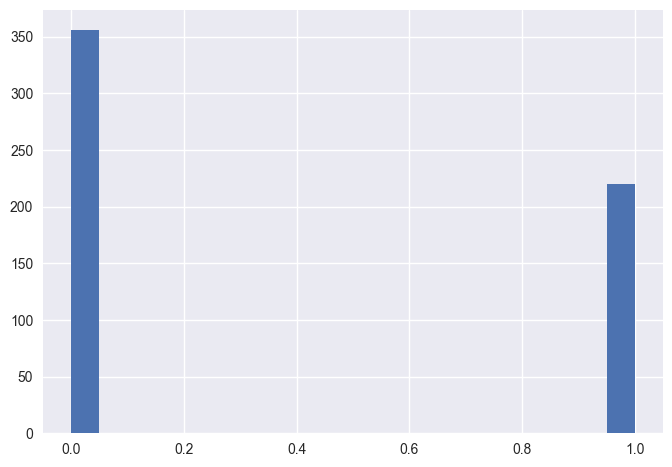

In [33]:
plt.style.use('seaborn')
df['private'].hist(bins=20)    

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\3758939069.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: >

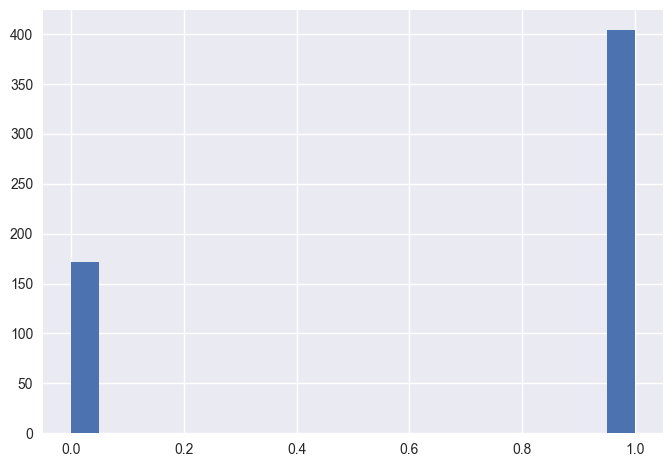

In [34]:
plt.style.use('seaborn')
df['profile pic'].hist(bins=20) 

In [35]:
df.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [36]:
plt.rcParams["figure.figsize"] = (30,10)

In [37]:
import seaborn as sns

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\2582022536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["#follows"])


4.724967697205058

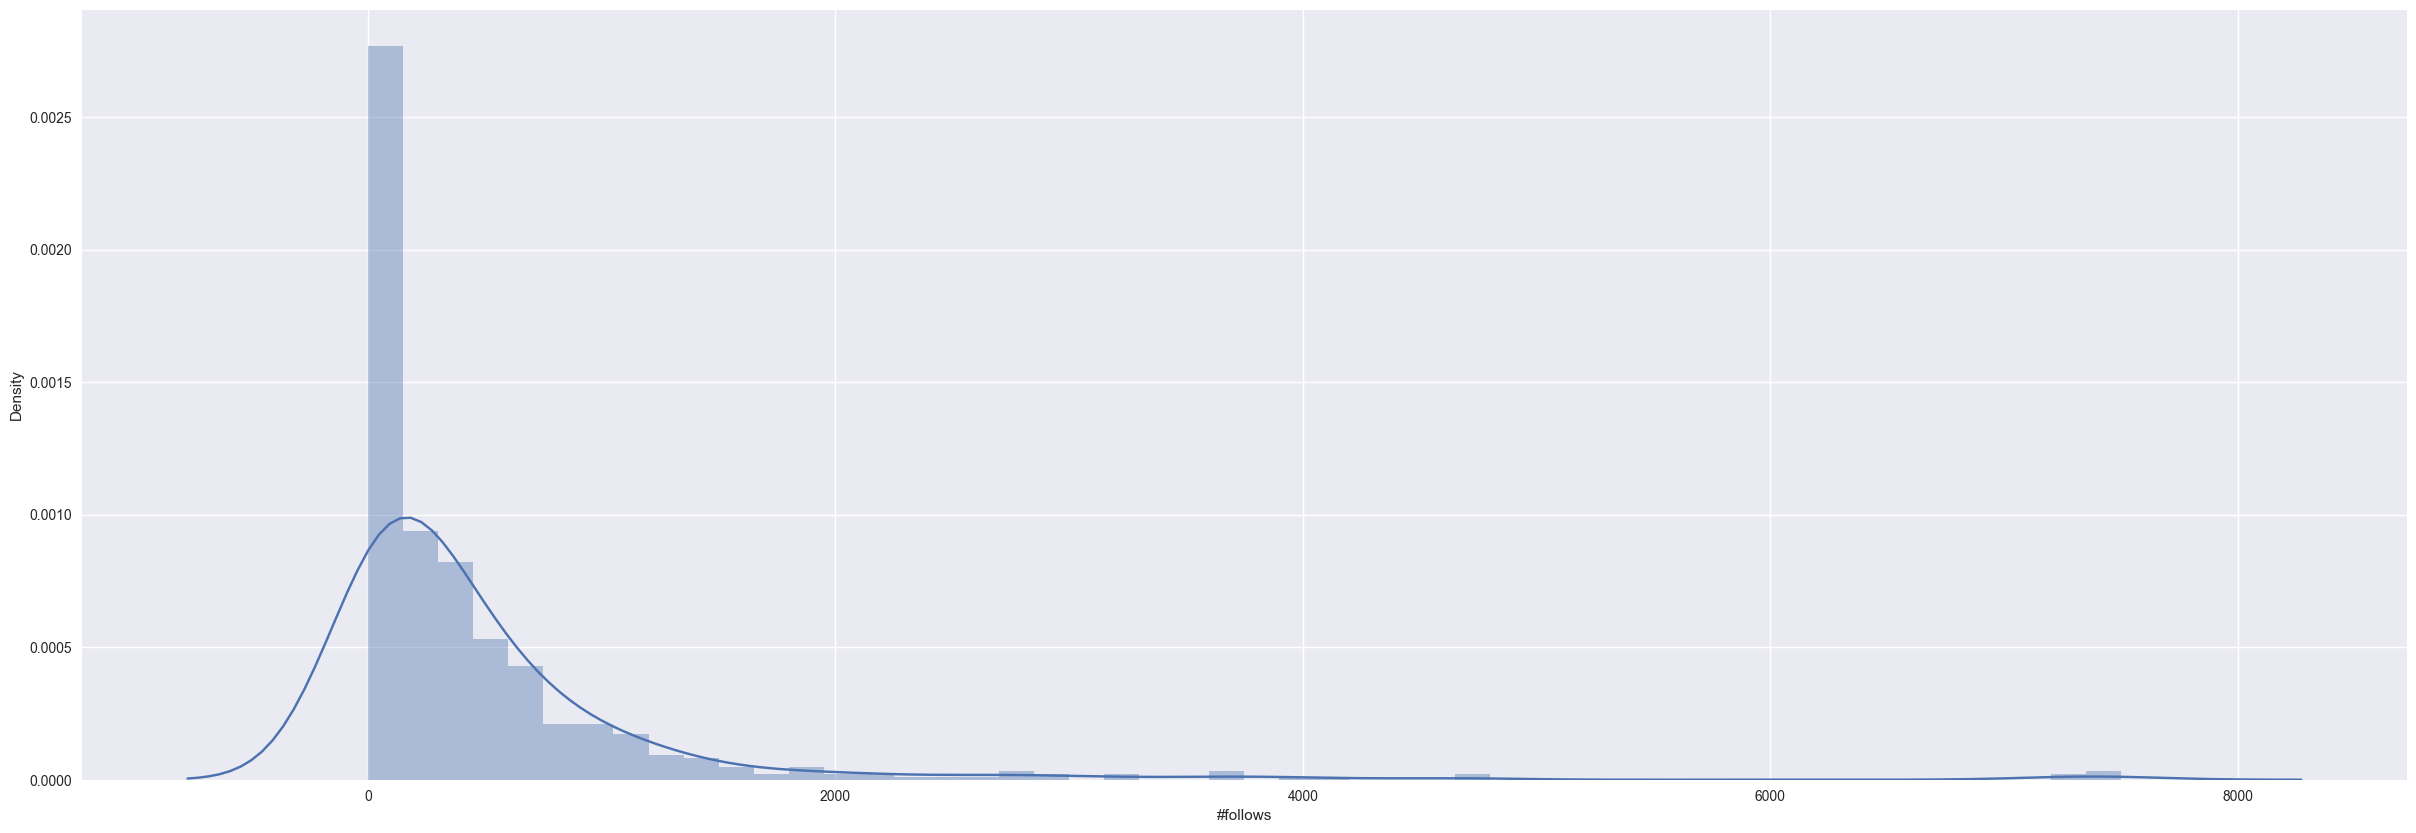

In [38]:
sns.distplot(df["#follows"])
df['#follows'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\905562628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["#followers"])


13.67904486141773

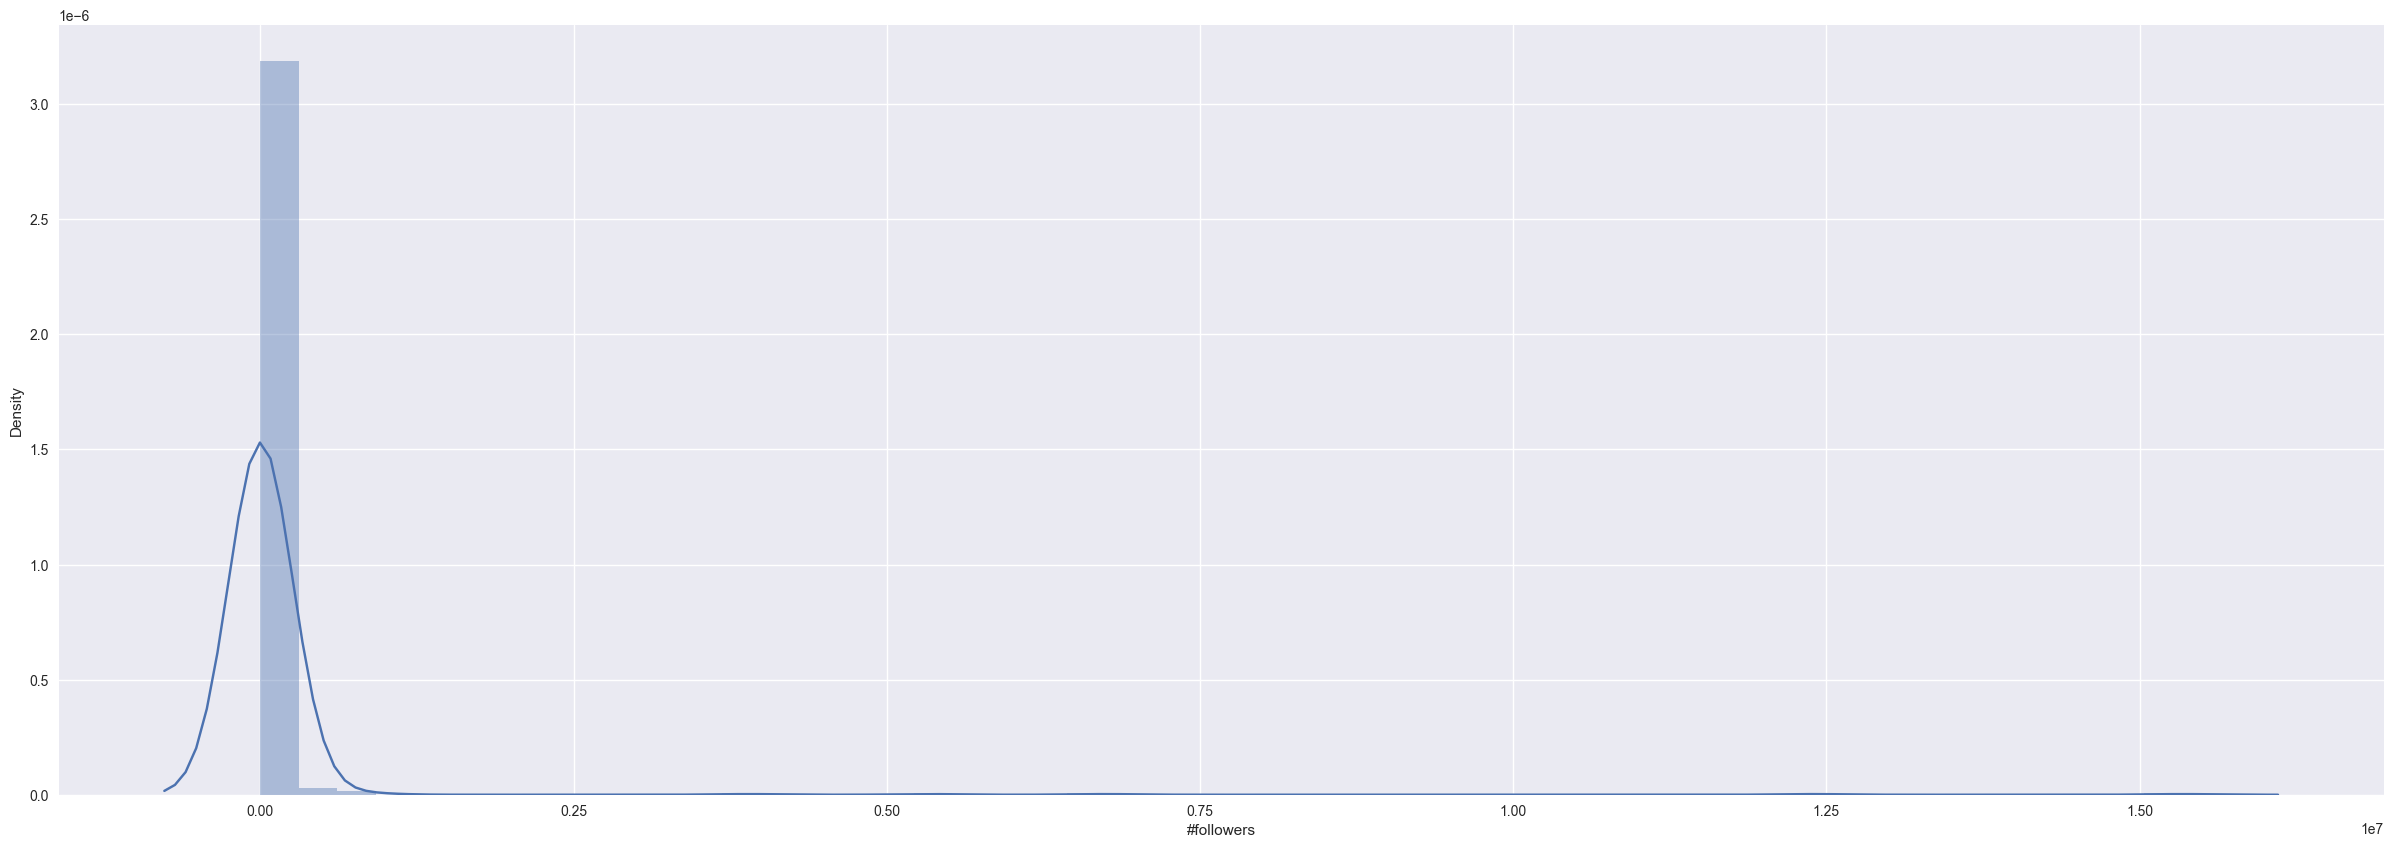

In [39]:
sns.distplot(df["#followers"])
df['#followers'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\754962500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["#posts"])


12.986195887205703

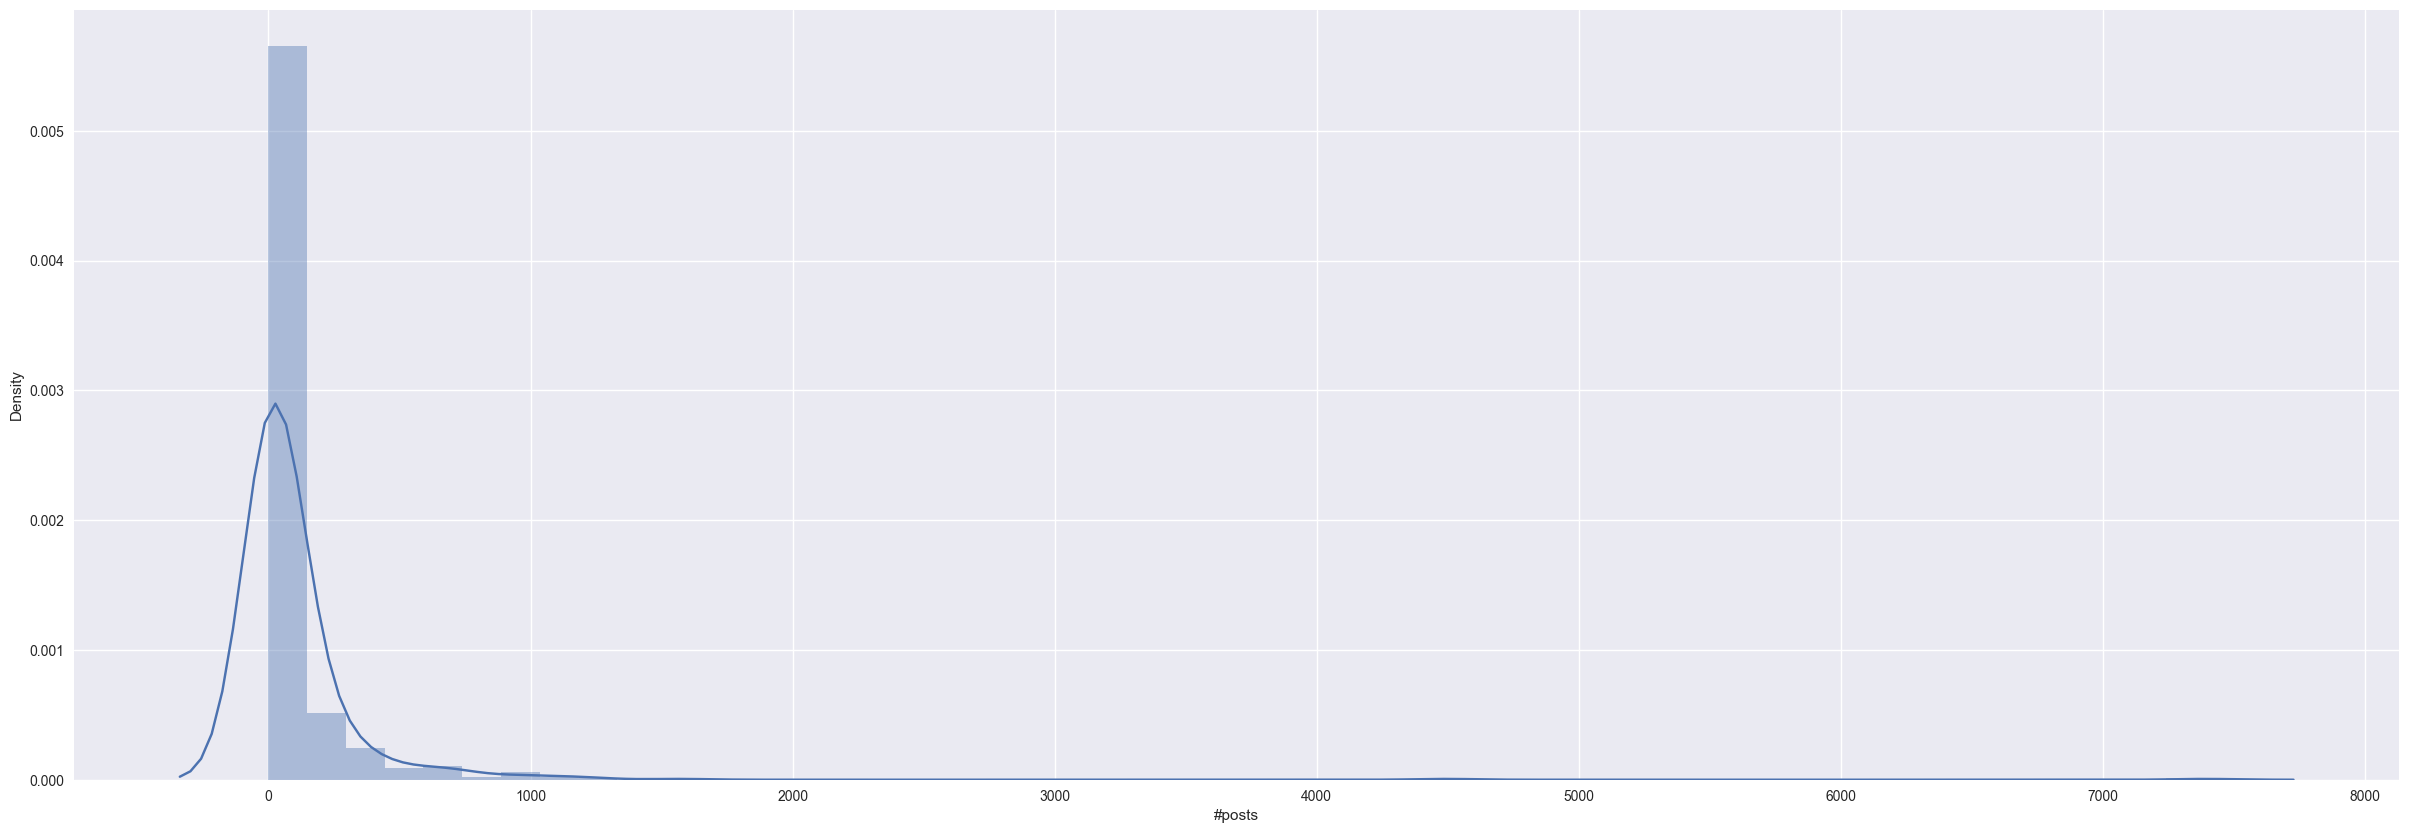

In [40]:
sns.distplot(df["#posts"])
df['#posts'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\867369801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["private"])


0.4872320413461685

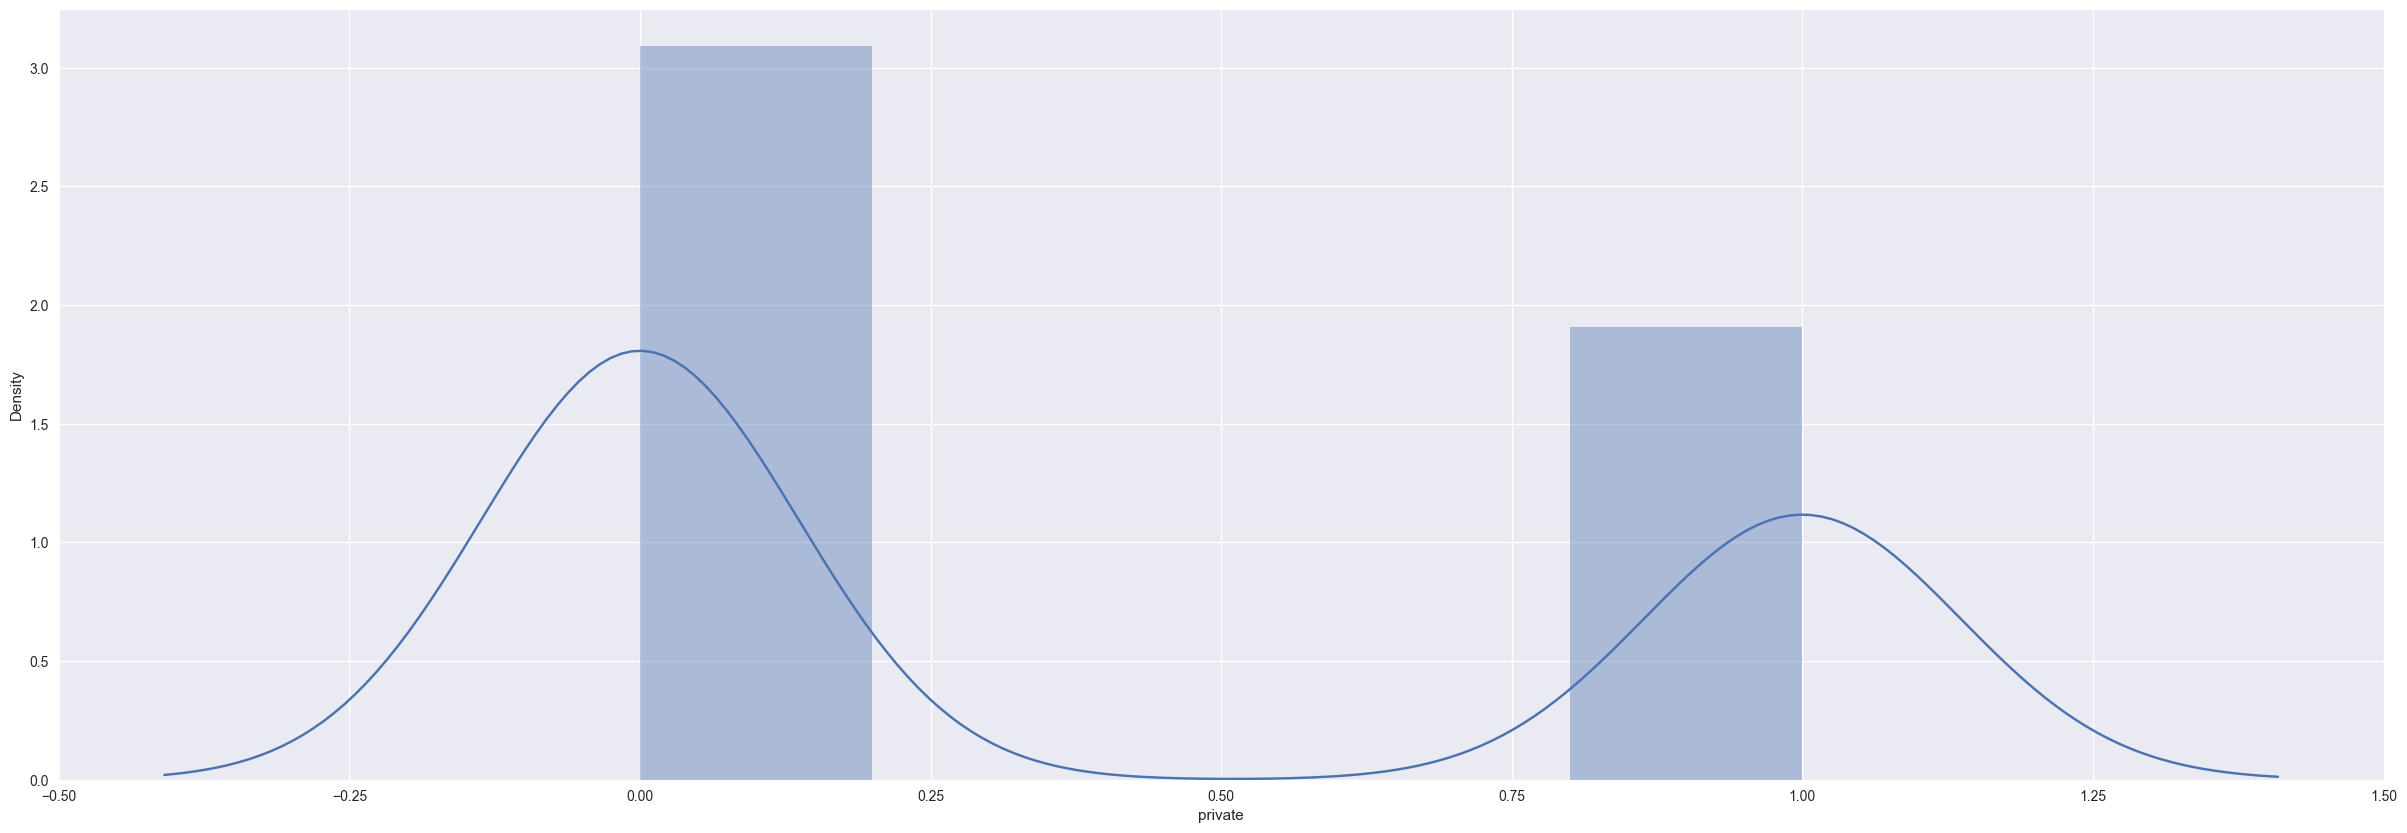

In [41]:
sns.distplot(df["private"])
df['private'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\3826985736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["external URL"])


2.3997126920306884

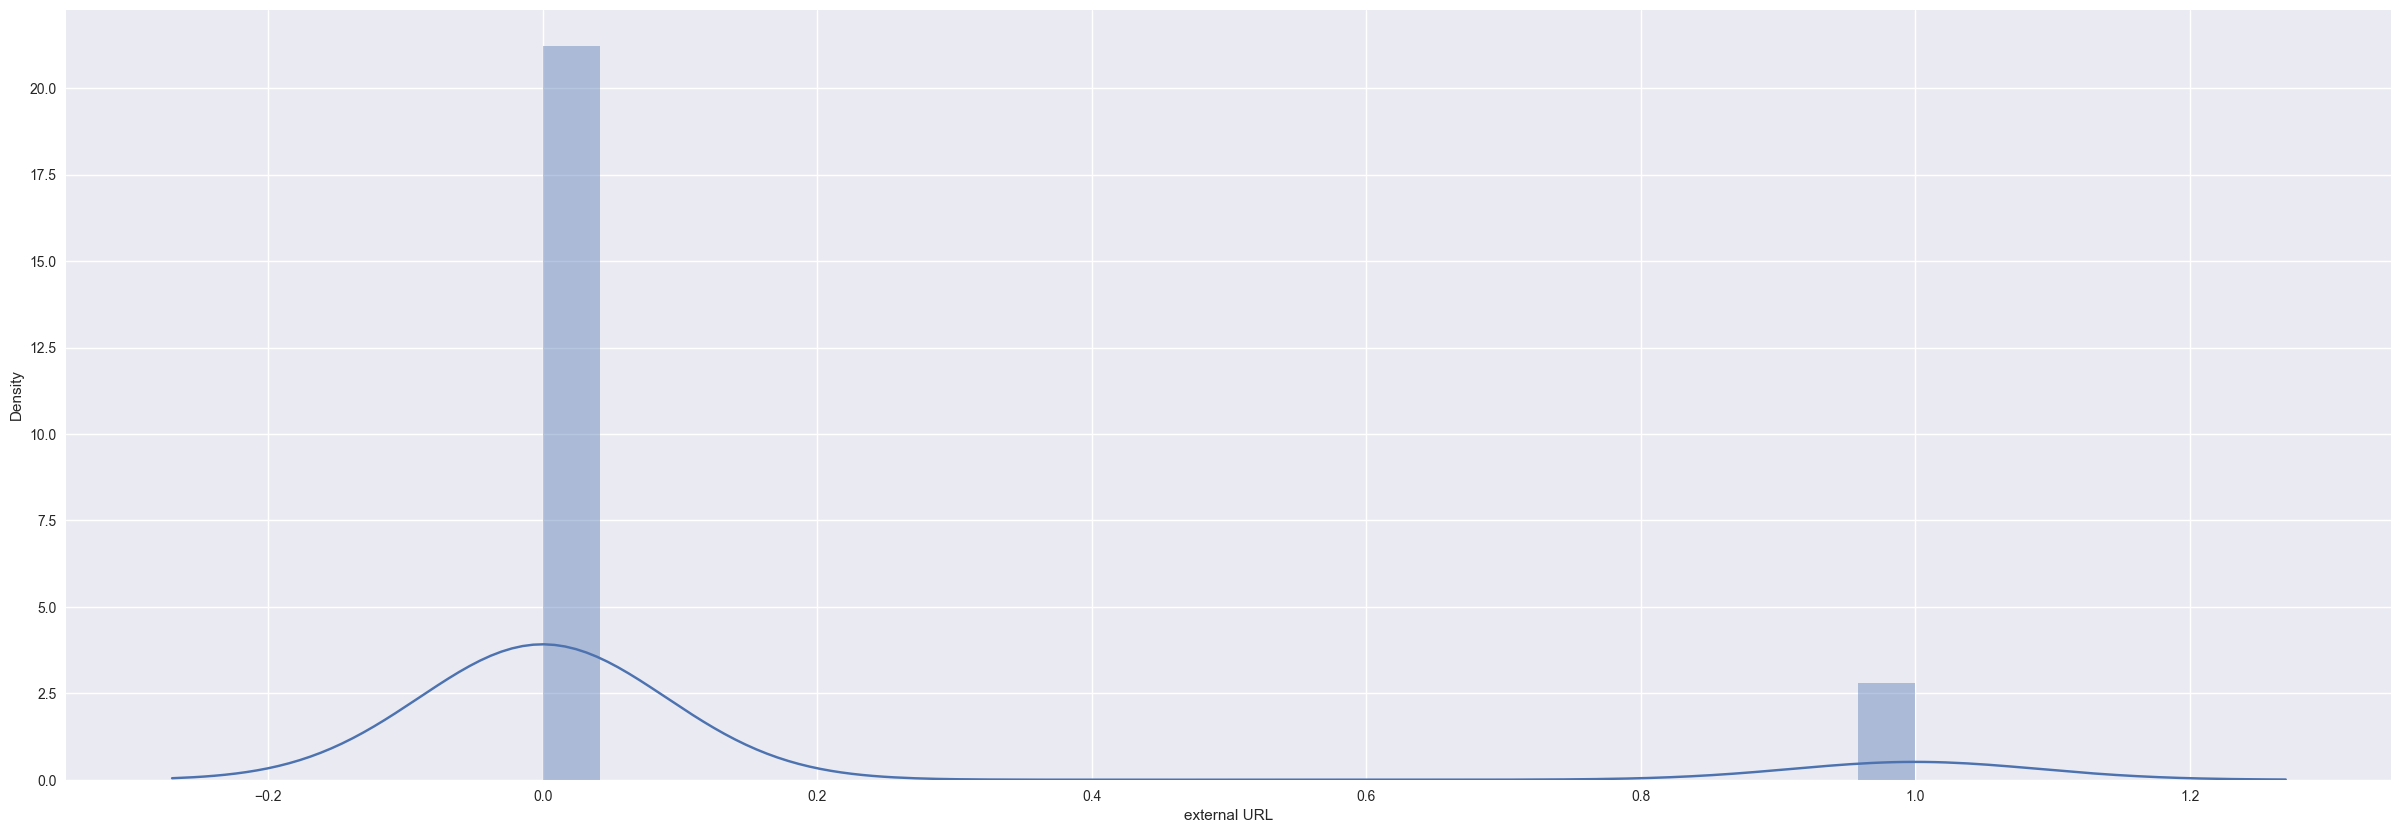

In [42]:
sns.distplot(df["external URL"])
df['external URL'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\1028226637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["description length"])


1.8668004695721174

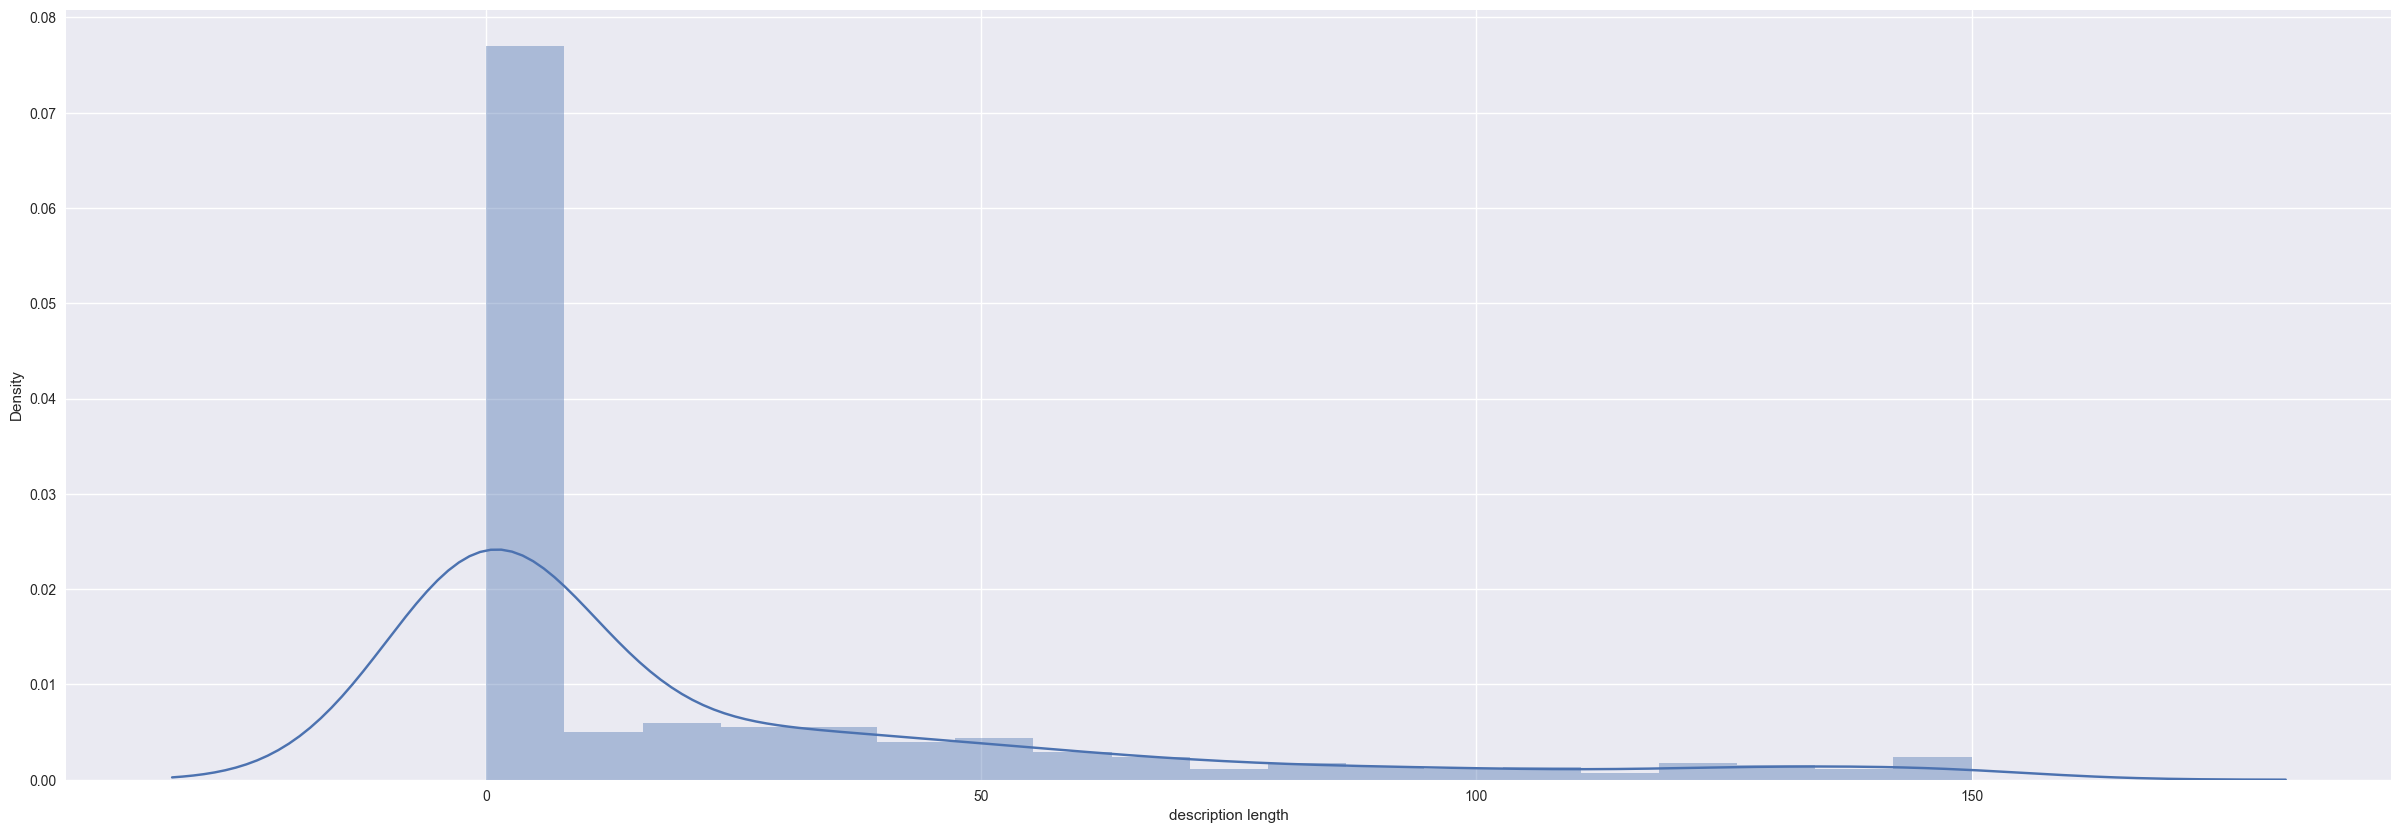

In [43]:
sns.distplot(df["description length"])
df['description length'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\1596414153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["nums/length fullname"])


4.436645238006572

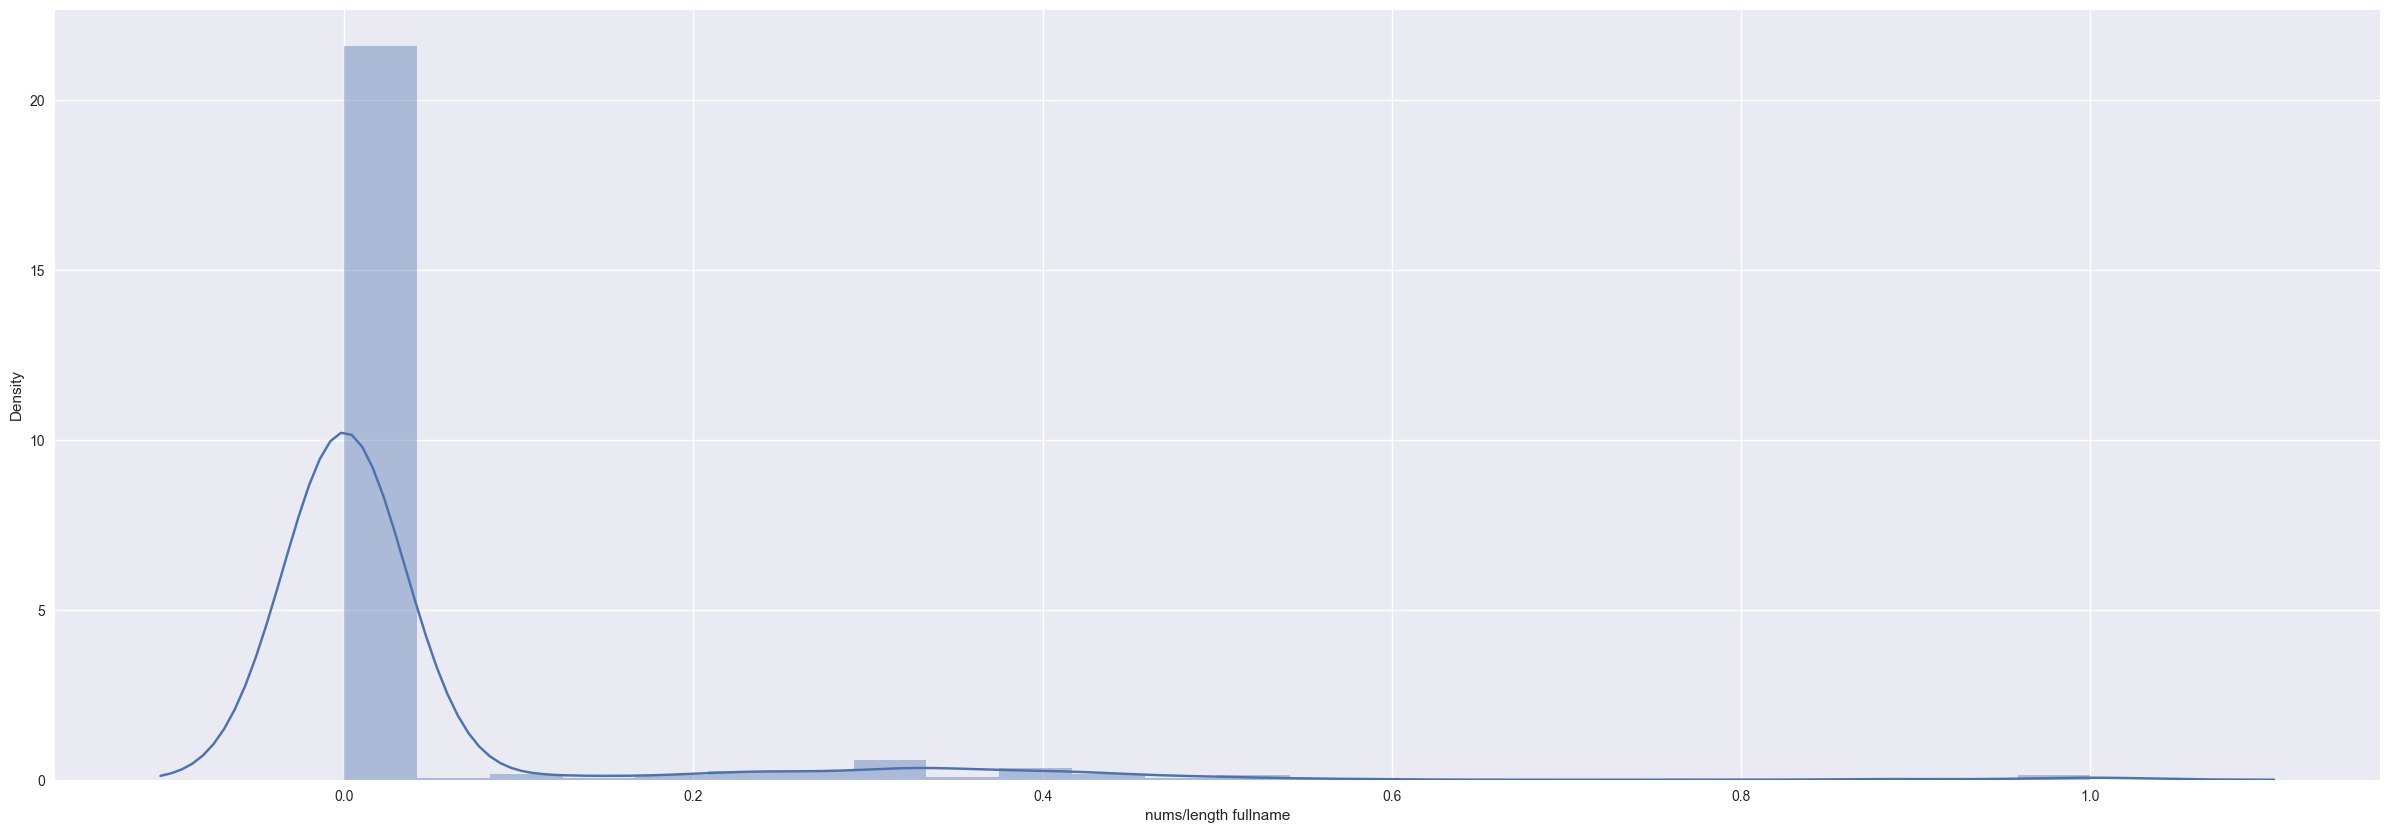

In [44]:
sns.distplot(df["nums/length fullname"])
df['nums/length fullname'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\2893400398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fullname words"])


3.324440164721317

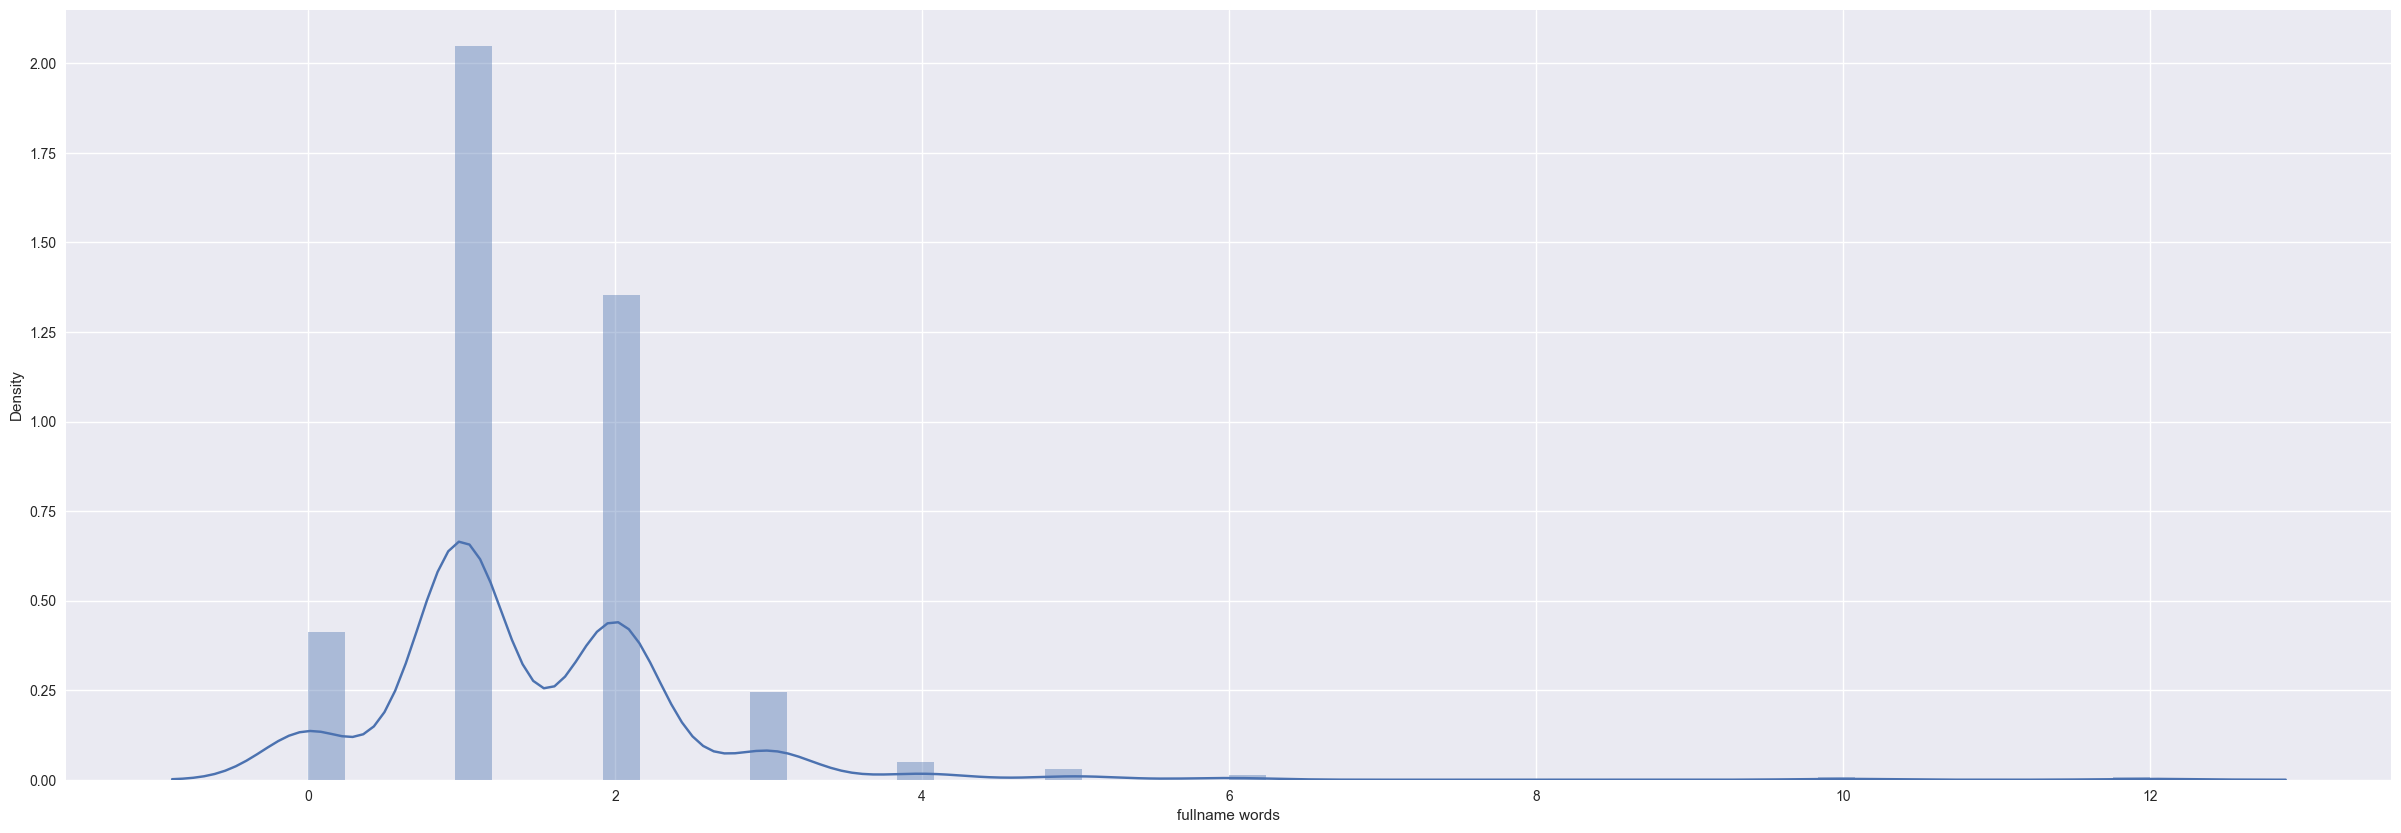

In [45]:
sns.distplot(df["fullname words"])
df['fullname words'].skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_19092\3195484667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["nums/length username"])


1.2629019102928685

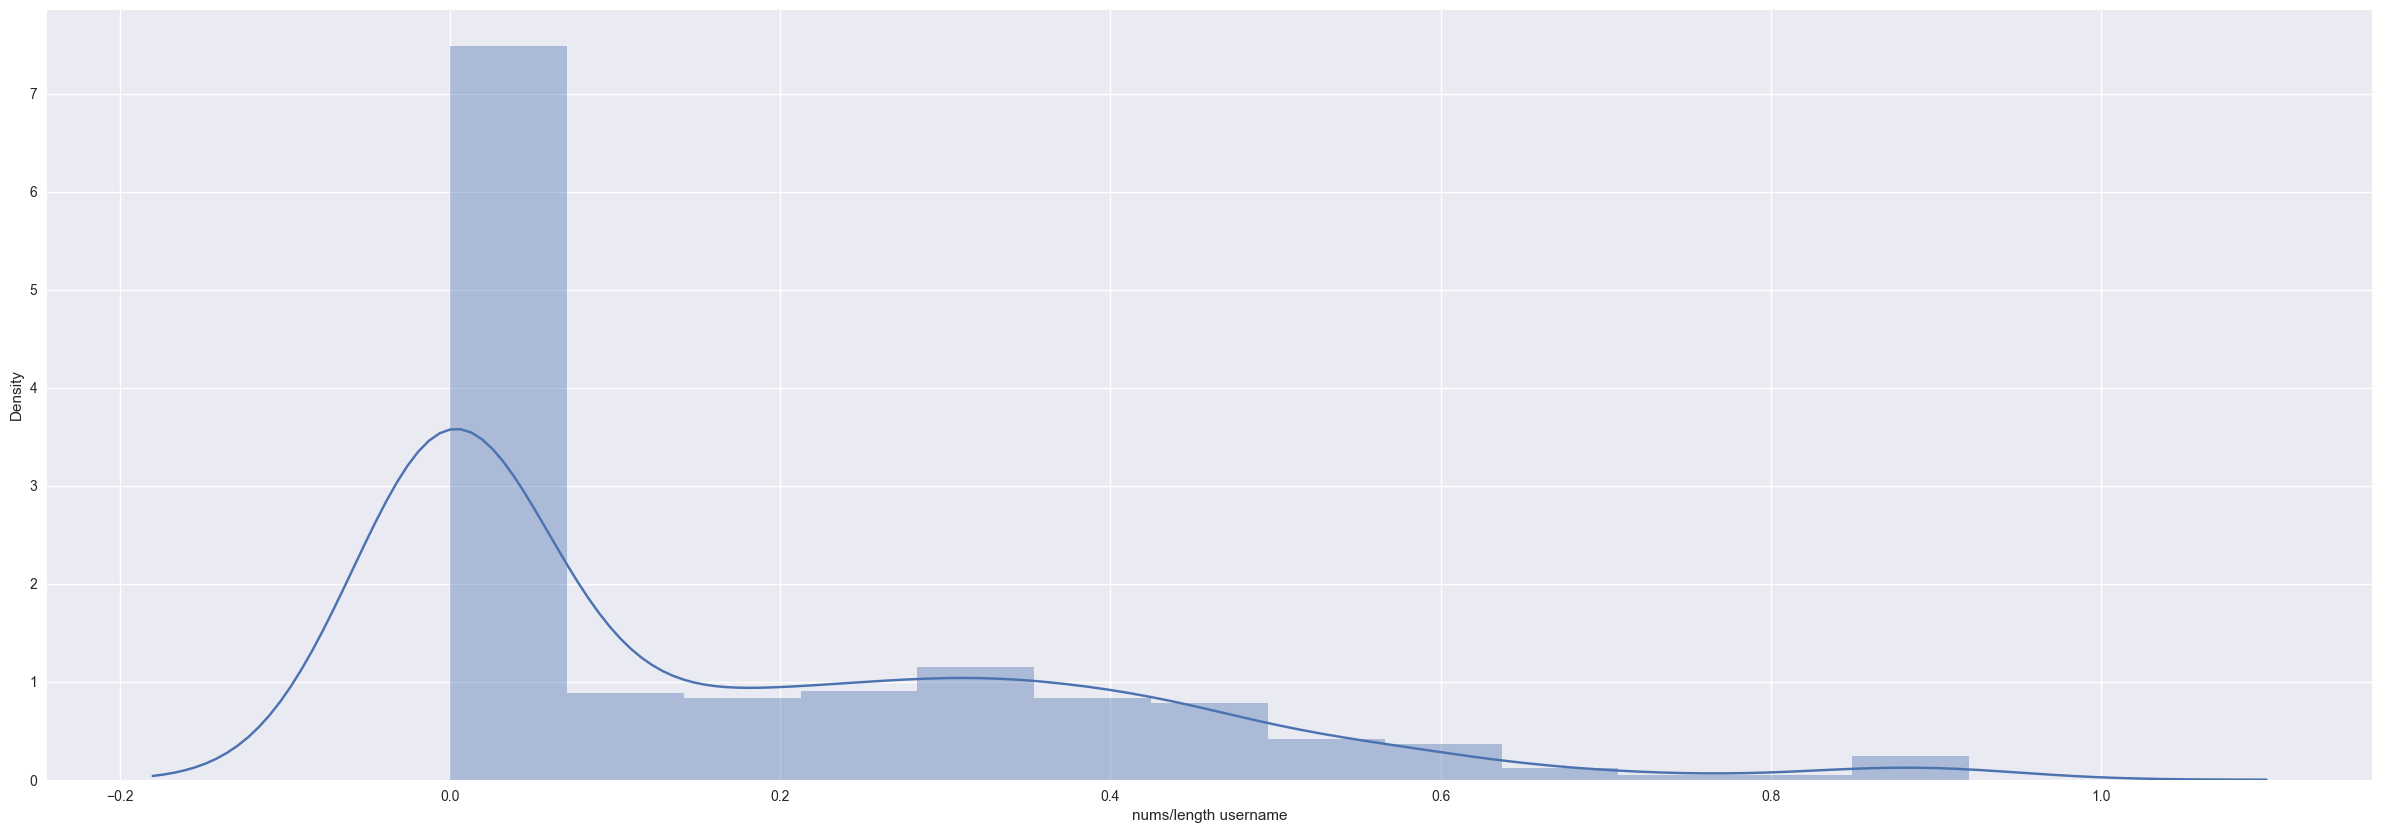

In [46]:
sns.distplot(df["nums/length username"])
df['nums/length username'].skew()

In [47]:
df.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [49]:
# Input = ['Make','Vehicle class','Engine Size(L)','Cylinders','Transmission','Fuel Type', 'Fuel consumption city', 'Fuel consumption hwy','Fuel consumption comb','Fuel consumption comb mpg']

In [50]:
X = df.drop(['fake'], axis=1).values

y = df['fake'].values

In [51]:
X.shape

(576, 11)

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
rfc = RandomForestClassifier(n_estimators=80, random_state=23)

In [56]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=23)

In [57]:
rfc.score(x_train,y_train)

1.0

In [58]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test )
accuracy_score(y_pred,y_test) 

0.9396551724137931

In [59]:
import sklearn.metrics

In [60]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.98      0.90      0.94        58

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



In [61]:
y_pred = rfc.predict(x_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[57,  1],
       [ 6, 52]], dtype=int64)

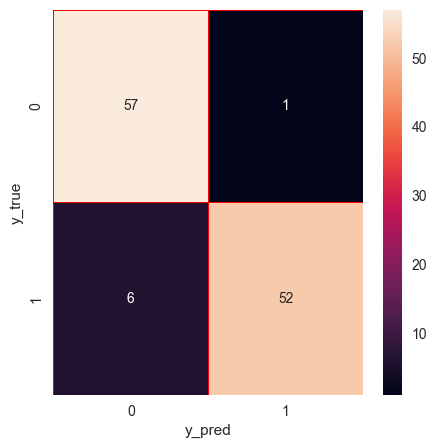

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [63]:
import pickle

pickle.dump(rfc,open('random_fake.pkl','wb'))
random = pickle.load(open('random_fake.pkl','rb'))

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [66]:
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [67]:
clf_gini.score(x_train,y_train)

0.9217391304347826

In [68]:
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(x_test )
accuracy_score(y_pred,y_test) 

0.9224137931034483

In [69]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.96      0.88      0.92        58

    accuracy                           0.92       116
   macro avg       0.93      0.92      0.92       116
weighted avg       0.93      0.92      0.92       116



In [70]:
y_pred = clf_gini.predict(x_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[56,  2],
       [ 7, 51]], dtype=int64)

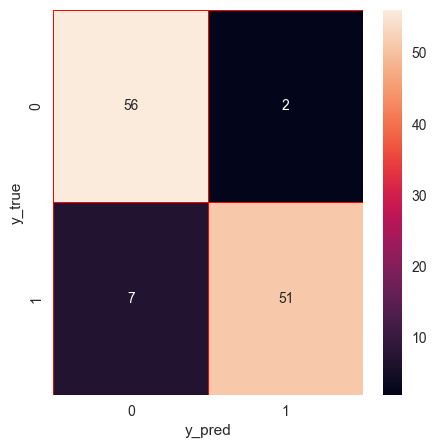

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [72]:
import pickle

pickle.dump(clf_gini,open('decision_fake.pkl','wb'))
clf_gini = pickle.load(open('decision_fake.pkl','rb'))